# 🔍 Day 4 Challenge

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [12]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

#  Pandas 

## Q1: Find all movies released in the year 2020. Display their title and duration.

In [31]:
movie_in_2020_df = df[(df['type'] == 'Movie') & (df['release_year'] == 2020)]
title_and_duration = movie_in_2020_df[['title', 'duration']]
title_and_duration

,title,duration
0,Dick Johnson Is Dead,90 min
16,Europe's Most Dangerous Man: Otto Skorzeny in ...,67 min
78,Tughlaq Durbar,145 min
84,Omo Ghetto: the Saga,147 min
103,Shadow Parties,117 min
...,...,...
3046,All the Freckles in the World,90 min
3060,Ghost Stories,145 min
5972,#cats_the_mewvie,90 min
7594,Norm of the North: Family Vacation,89 min


## Q2: Which 3 countries have produced the highest number of TV Shows?

In [48]:
TV_show_df = df[df['type'] == 'TV Show']
TV_show_top_countries = TV_show_df.groupby('country').size().sort_values(ascending = False).reset_index(name = 'Tv_show_count')
TV_show_top_3_countries = TV_show_top_countries.head(3)
TV_show_top_3_countries

,country,Tv_show_count
0,United States,760
1,United Kingdom,213
2,Japan,169


## Q3: Check if there are any missing values in the ‘director’ column. Count them.

In [55]:
missing_val_director = df['director'].isnull()
missing_val_director_count = df['director'].isnull().sum()
missing_val_director_count

2634

# 📊 Visualization

## Q1: Create a bar chart showing the top 5 genres (from the 'listed_in' column).

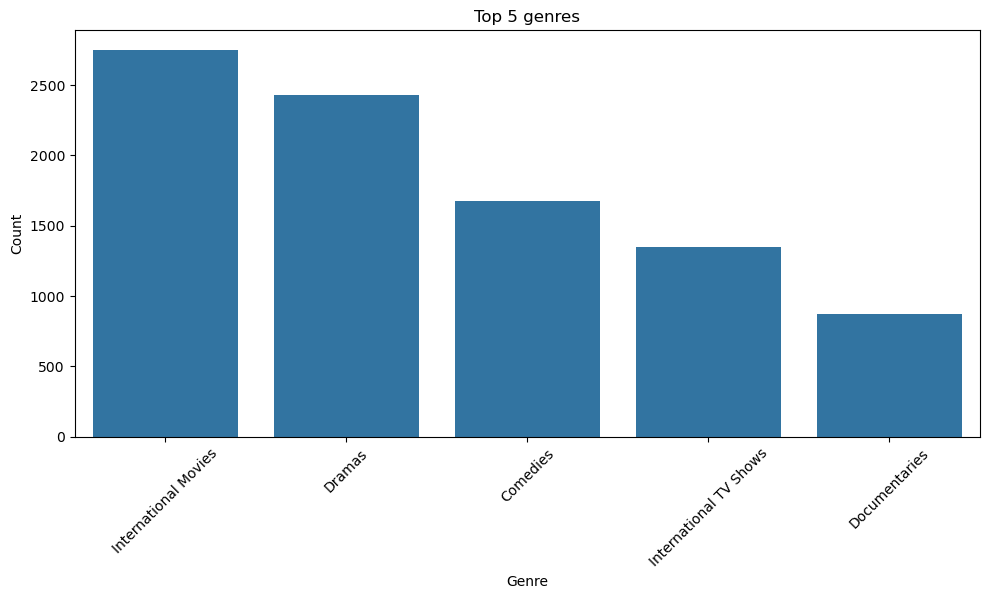

In [93]:
genre_exploded =  df['listed_in'].dropna().str.split(", ").explode()
genre_exploded
top_genre = genre_exploded.value_counts().sort_values(ascending = False).reset_index(name = 'count').head(5)
top_genre
plt.figure(figsize = (10,5))
sns.barplot(data = top_genre, x = 'listed_in', y = 'count')
plt.title("Top 5 genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

## Q2: Plot the number of movies and TV Shows added each year. Use a grouped bar chart.

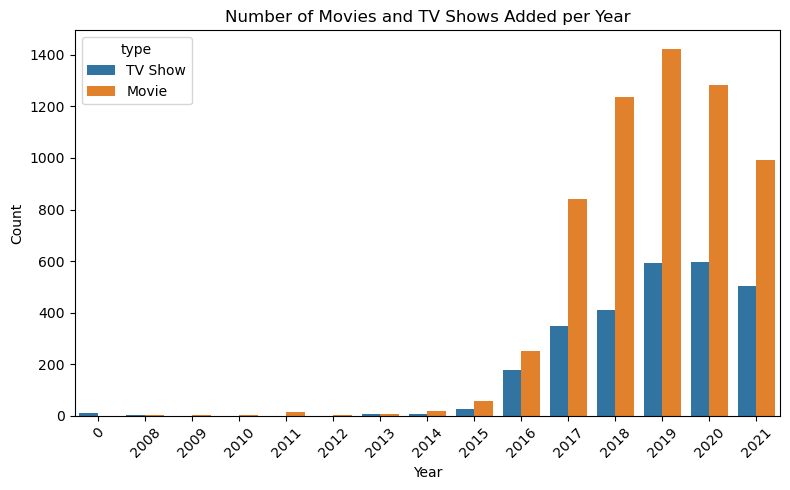

In [128]:
df['date_added'] = pd.to_datetime(df['date_added'], format = 'mixed')
df['year_added'] = df['date_added'].dt.year
df['year_added'] = df['year_added'].fillna(0).astype(int)

type_count = df.groupby(['year_added', 'type'])['type'].size().reset_index(name = 'count')
type_count

plt.figure(figsize = (8,5))
sns.barplot(data = type_count, x = 'year_added', y = 'count', hue = 'type')
plt.title('Number of Movies and TV Shows Added per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Q3: Make a pie chart showing the distribution of content rating types (e.g., TV-MA, PG, etc.).

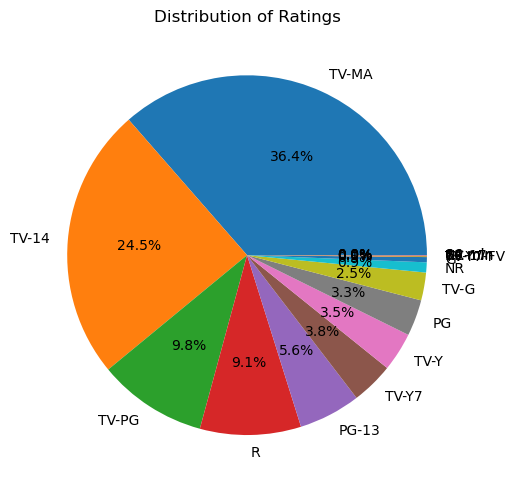

In [153]:
rating_type_df = df.groupby('rating').size().sort_values(ascending = False).reset_index(name = 'count')
rating_type_df
plt.figure(figsize = (8,5))
plt.pie(rating_type_df['count'], labels = rating_type_df['rating'], autopct = '%1.1f%%')
plt.title('Distribution of Ratings')
plt.tight_layout()
plt.show()

# 📈 EDA 

## Q1: What is the average duration of movies (in minutes)? Clean the 'duration' column first.

In [157]:
df['duration']

0          90 min
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8802      158 min
8803    2 Seasons
8804       88 min
8805       88 min
8806      111 min
Name: duration, Length: 8807, dtype: object

In [185]:
movies_df = df[df['type'] == 'Movie']
clean_duration = movies_df['duration'].dropna().str.replace(' min', '').astype(int)
avg_duration = round(clean_duration.mean(),2)
print(f"The avg duration of movies (in minutes) is {avg_duration}.")


The avg duration of movies (in minutes) is 99.58.


## Q2: Find the most frequent director on the platform. How many titles have they directed?

In [212]:
top_director = df['director'].value_counts().sort_values(ascending = False).head(1)
top_director
print(f"The most frequent director on the platform is {top_director.index[0]}.")

The most frequent director on the platform is Rajiv Chilaka.


## Q3: Which month sees the most content being added? Does this vary by year?

In [231]:
df['month_added'] = df['date_added'].dt.month_name()
by_month_df = df['month_added'].value_counts().sort_values(ascending = False)
by_month_df
month_year_added = df.groupby(['year_added', 'month_added']).size().sort_values(ascending = False)
month_year_added

year_added  month_added
2021        July           257
2019        November       255
            December       215
2021        June           207
2020        January        205
                          ... 
2013        March            1
2015        January          1
2014        August           1
            July             1
2008        February         1
Length: 108, dtype: int64

# 📊 Statistics

## Q1: Calculate the mean, median, and mode for movie durations. Interpret them.

In [236]:
df['duration']

0          90 min
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8802      158 min
8803    2 Seasons
8804       88 min
8805       88 min
8806      111 min
Name: duration, Length: 8807, dtype: object

In [271]:
movie_df = df[df['type'] == 'Movie'].copy()
movie_df = movie_df.dropna(subset=['duration'])
movie_df['duration'] = movie_df['duration'].str.replace(" min", "").astype(int)
movie_duration_mean = movie_df['duration'].mean()
print(f"The mean of movie duration is: {round(movie_duration_mean,2)} min.")
print(f"The median of movie duration is: {round(movie_df['duration'].median(),2)} min.")
print(f"The mode of movie duration is: {round(movie_df['duration'].mode(),2)} min.")

The mean of movie duration is: 99.58 min.
The median of movie duration is: 98.0 min.
The mode of movie duration is: 0    90
Name: duration, dtype: int32 min.


## Q2: What percentage of TV Shows have only 1 season?

In [286]:
TV_Show_df = df[df['type'] == 'TV Show']
one_season_df = TV_Show_df[TV_Show_df['duration'] == '1 Season']
percent_TV_Show = (len(one_season_df) / len(TV_Show_df)) * 100.0
print(f"The percentage of TV Shows having only 1 season is: {round(percent_TV_Show,2)}%.")

The percentage of TV Shows having only 1 season is: 67.0%.
